# Assignment: Sentimental Analysis

In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline  

In [4]:
import pandas as pd
df=pd.read_csv("Elon_musk.csv",encoding="latin1")  
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
df=df.drop("Unnamed: 0",axis=1)

In [6]:
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [7]:
for i in df.Text:
  print(i.strip())

@kunalb11 Im an alien
@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
@joerogan @Spotify Great interview!
@gtera27 Doge is underestimated
@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
Happy New Year of the Ox! https://t.co/9WFKMYu2oj
Frodo was the underdoge,
All thought he would fail,
Himself most of all. https://t.co/zGxJFDzzrM
@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.
The most entertaining outcome is the most likely
@GiveDirectly Just sent some
Just agree to do Clubhouse with @kanyewest
https://t.co/3rWE9uHSTS
@geoffkeighley @UnrealEngine Its getting real
Bought some Dogecoin for lil X, so he can be a toddler hodler
@JoshManMode He definitely has issues, but the sentencing seems a bit high
@freewalletorg Thanks for fixing
@freewalletorg Please unlock my account
@AstroJordy <U+0001F923><U+0001F923

In [8]:
df = [x.strip() for x in df.Text] # remove both the leading and the trailing characters


In [9]:
df

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [10]:
df = [x for x in df if x] # removes empty strings, because they are considered in Python as False
df[0:10]   

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [11]:
# Joining the list into one string/text
text = ' '.join(df)
print(text) 

@kunalb11 Im an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,
All thought he would fail,
Himself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine Its getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923

In [12]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [14]:
import nltk

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
#Tokenization: Natuaral Langauage Toolkit
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens) 

['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'kanyewest', 'httpstco3rWE9uHSTS', 'geoffkeighley', 'UnrealEngine', 'It\x9

In [17]:
len(text_tokens) 

21078

In [18]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
len(my_stop_words)

180

In [21]:
text_tokens

['kunalb11',
 'I\x92m',
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 

In [22]:
#Removing the stop words
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40]) 

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail']


In [23]:
len(no_stop_tokens)

15751

In [24]:
#list comprehension
m = []
for i in range(1,11):
    m.append(i**2)

In [25]:
m

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [26]:
[i**2 for i in range(1,11)]

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [27]:
#Syntax: [var for var in seq]

In [28]:
for i in no_stop_tokens:
    print(i.lower())

kunalb11
im
alien
idaacarmack
ray
tracing
cyberpunk
hdr
nextlevel
have
tried
joerogan
spotify
great
interview
gtera27
doge
underestimated
teslacn
congratulations
tesla
china
amazing
execution
last
year
now
next
even
happy
new
year
ox
httpstco9wfkmyu2oj
frodo
underdoge
all
thought
would
fail
himself
httpstcozgxjfdzzrm
owensparks
flcnhvy
anonyx10
haha
thanks
flcnhvy
anonyx10
indeed
tweets
definitely
represent
realworld
time
allocation
the
entertaining
outcome
likely
givedirectly
just
sent
just
agree
clubhouse
kanyewest
httpstco3rwe9uhsts
geoffkeighley
unrealengine
its
getting
real
bought
dogecoin
lil
x
toddler
hodler
joshmanmode
he
definitely
issues
sentencing
seems
bit
high
freewalletorg
thanks
fixing
freewalletorg
please
unlock
account
astrojordy
u0001f923u0001f923
this
true
power
haha
httpstcofc9uhqsd7o
freewalletorg
any
crypto
wallet
wont
give
private
keys
avoided
costs
freewalletorg
your
app
sucks
rt
spacex
nasa
selected
falcon
heavy
launch
first
two
elements
lunar
gateway
togeth

In [29]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25]) 

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last']


In [30]:
len(lower_words)

15751

In [31]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40]) 

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail']


In [36]:
#!python -m spacy download en
#!python -m spacy download en_core_web_lg

In [38]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm') 

In [39]:
nlp

In [40]:
no_stop_tokens

['kunalb11',
 'I\x92m',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'Have',
 'tried',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'next',
 'even',
 'Happy',
 'New',
 'Year',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'underdoge',
 'All',
 'thought',
 'would',
 'fail',
 'Himself',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'entertaining',
 'outcome',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'Just',
 'agree',
 'Clubhouse',
 'kanyewest',
 'httpstco3rWE9uHSTS',
 'geoffkeighley',
 'UnrealEngine',
 'It\x92s',
 'getting',
 'real',
 'Bought',
 'Dogecoin',
 'lil',
 'X',
 'toddler',
 'hodler',
 'JoshManMode',
 'He',
 'definitely',
 'issues',
 'se

In [41]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40]) 

kunalb11 Im alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail


In [42]:
len(doc)

15795

In [43]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['kunalb11', 'i\x92m', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last']


In [44]:
len(lemmas)

15795

#### Feature Extraction

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas) 

In [46]:
print(vectorizer.vocabulary_)

{'kunalb11': 2712, 'alien': 232, 'idaacarmack': 2449, 'ray': 3627, 'trace': 4508, 'cyberpunk': 968, 'hdr': 1686, 'nextlevel': 3164, 'have': 1680, 'try': 4544, 'joerogan': 2632, 'spotify': 4125, 'great': 1620, 'interview': 2560, 'gtera27': 1639, 'doge': 1121, 'underestimate': 4677, 'teslacn': 4353, 'congratulations': 863, 'tesla': 4347, 'china': 746, 'amazing': 258, 'execution': 1335, 'last': 2731, 'year': 4949, 'now': 3204, 'next': 3163, 'even': 1307, 'happy': 1667, 'new': 3160, 'ox': 3320, 'httpstco9wfkmyu2oj': 1875, 'frodo': 1503, 'underdoge': 4676, 'all': 235, 'thought': 4432, 'would': 4925, 'fail': 1371, 'himself': 1730, 'httpstcozgxjfdzzrm': 2408, 'owensparks': 3317, 'flcnhvy': 1445, 'anonyx10': 287, 'haha': 1653, 'thank': 4390, 'indeed': 2498, 'tweets': 4567, 'definitely': 1023, 'represent': 3711, 'realworld': 3652, 'time': 4451, 'allocation': 237, 'the': 4398, 'entertaining': 1263, 'outcome': 3296, 'likely': 2792, 'givedirectly': 1590, 'just': 2660, 'send': 3898, 'agree': 201, '

In [47]:
X.toarray().shape

(15795, 4983)

In [48]:
print(vectorizer.get_feature_names()[0:100])
print(X.toarray()[50:100]) 

['005', '10', '100', '1000', '10000', '107', '10x', '11', '112', '11thhour', '12', '122', '13', '130pm', '13arm13arm', '13ericralph31', '14', '140pm', '149watt', '14yearold', '15', '150', '155', '16', '162', '17', '18', '1880s', '1b', '1matthewgarcia', '1st', '1stprinciples4l', '20', '200', '2007', '2008', '2009', '2012', '2017', '2020', '2021', '2024', '2026', '2030', '20k', '210', '218', '21st', '22', '225', '23', '230', '24', '240am', '247teslanews', '25', '250', '250kw', '25d', '25gunsteslacom', '25k', '25th', '28', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680', '479000', '48', '4d', '4th']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


c:\users\ankit\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [49]:
print(X.toarray().shape) 

(15795, 4983)


#### Let's see how can bigrams and trigrams can be included here

In [50]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(lemmas) 

In [51]:
vectorizer_ngram_range.vocabulary_

{'idaacarmack': 32,
 'great': 28,
 'tesla': 71,
 'year': 97,
 'next': 50,
 'new': 49,
 'would': 95,
 'flcnhvy': 23,
 'haha': 29,
 'thank': 76,
 'time': 84,
 'the': 78,
 'it': 33,
 'get': 25,
 'high': 31,
 'u0001f923u0001f923': 86,
 'this': 83,
 'true': 85,
 'rt': 62,
 'spacex': 66,
 'nasa': 46,
 'falcon': 20,
 'launch': 36,
 'first': 22,
 'one': 53,
 'mission': 43,
 'ajtourville': 1,
 'yes': 98,
 'rationaletienne': 59,
 'well': 91,
 'amp': 3,
 'need': 48,
 'make': 40,
 'earth': 14,
 'take': 70,
 'that': 77,
 'you': 99,
 're': 60,
 'work': 94,
 'go': 26,
 'erdayastronaut': 17,
 'people': 54,
 'lexfridman': 37,
 'come': 8,
 'not': 52,
 'kristennetten': 34,
 'yeah': 96,
 'sure': 69,
 'much': 45,
 'teslarati': 73,
 'will': 93,
 'still': 68,
 'use': 87,
 'nasaspaceflight': 47,
 'engine': 15,
 'good': 27,
 'we': 89,
 'land': 35,
 'actually': 0,
 'no': 51,
 'hard': 30,
 'space': 64,
 'dragon': 13,
 'felixschlang': 21,
 'marcushousegame': 41,
 'crew': 11,
 'big': 5,
 'lot': 39,
 'ercxspace': 1

In [52]:
bow_matrix_ngram.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'ajtourville', 'also', 'amp', 'austinbarnard45', 'big', 'car', 'cleantechnica', 'come', 'cool', 'could', 'crew', 'day', 'dragon', 'earth', 'engine', 'ercxspace', 'erdayastronaut', 'evafoxu', 'exactly', 'falcon', 'felixschlang', 'first', 'flcnhvy', 'flight', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'idaacarmack', 'it', 'kristennetten', 'land', 'launch', 'lexfridman', 'like', 'lot', 'make', 'marcushousegame', 'maybe', 'mission', 'model', 'much', 'nasa', 'nasaspaceflight', 'need', 'new', 'next', 'no', 'not', 'one', 'people', 'ppathole', 'pretty', 'probably', 'production', 'rationaletienne', 're', 'right', 'rt', 'soon', 'space', 'spacestation', 'spacex', 'starship', 'still', 'sure', 'take', 'tesla', 'teslaownerssv', 'teslarati', 'tesmaniancom', 'test', 'thank', 'that', 'the', 'there', 'thesheetztweetz', 'they', 'think', 'this', 'time', 'true', 'u0001f923u0001f923', 'use', 'way', 'we', 'we re', 'well', 'wholemarsblog', 'will', 'work', 'would', 'yeah', 'year', 'yes'

#### TFidf vectorizer

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(ngram_range=(1,3), max_features = 500)


In [55]:
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemmas)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray()) 

['10', '100', '13', '20', '2020', '28delayslater', '30', '60', 'able', 'absolutely', 'access', 'accurate', 'actually', 'adamklotz', 'add', 'ago', 'agree', 'ai', 'air', 'ajtourville', 'all', 'almost', 'already', 'also', 'although', 'amazing', 'amp', 'and', 'apply', 'appreciate', 'archillect', 'around', 'article', 'as', 'astrobehnken', 'astrodoug', 'astrojordy', 'astronaut', 'austinbarnard45', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'become', 'benmezrich', 'berlin', 'berniesanders', 'beta', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'build', 'but', 'call', 'camera', 'can', 'car', 'cargo', 'casparstanley', 'cbass3d', 'cell', 'change', 'cleantechnica', 'close', 'cold', 'come', 'company', 'complete', 'confirm', 'congratulations', 'control', 'cool', 'cost', 'could', 'course', 'create', 'crew', 'crew1', 'critical', 'curevac', 'cyberpunkgame', 'day', 'deep', 'definitely', 'delivery', 'design', 'didn', 'difference', 'different', 'djs

In [56]:
tf_idf_matrix_n_gram_max_features.shape

(15795, 500)

####  Generate wordcloud

In [57]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud


In [58]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 15))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

In [59]:
len(STOPWORDS)

192

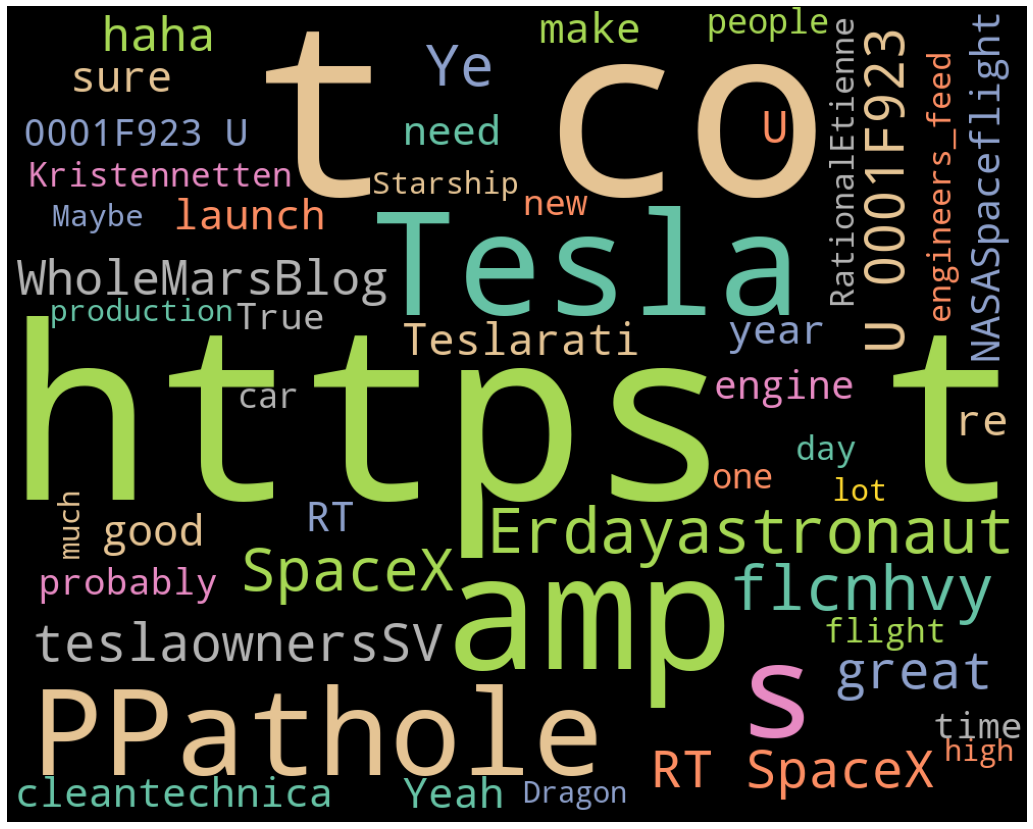

In [60]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 1000, height = 800, background_color='black', max_words=50,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [61]:
wordcloud

In [73]:
# Save image
#wordcloud.to_file("wordcloud.png")